# Objective: How to increase the SAT participation rates

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime as dt
plt.style.use('ggplot')
% matplotlib inline

/Users/Scott/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


##### Lets first load in the data

In [6]:
act_data = pd.read_csv('/Users/Scott/Documents/DSI6/Repo /project-1/data/act.csv')
sat_data = pd.read_csv('/Users/Scott/Documents/DSI6/Repo /project-1/data/sat.csv')

##### Performing some initial EDA on ACT

In [15]:
act_data.shape

(51, 6)

In [9]:
act_data.head()

,Unnamed: 0,State,Participation,English,Math,Reading,Science,Composite
0,0,National,60%,20.3,20.7,21.4,21.0,21.0
1,1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4


In [8]:
act_data.describe()

,Unnamed: 0,English,Math,Reading,Science,Composite
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,25.500000,20.919231,21.173077,22.001923,21.442308,21.509615
std,15.154757,2.332132,1.963602,2.048672,1.723351,2.002083
min,0.000000,16.300000,18.000000,18.100000,18.200000,17.800000
25%,12.750000,19.000000,19.400000,20.475000,19.975000,19.800000
50%,25.500000,20.550000,20.900000,21.700000,21.300000,21.400000
75%,38.250000,23.300000,23.100000,24.125000,23.200000,23.600000
max,51.000000,25.500000,25.300000,26.000000,24.900000,25.500000


In [19]:
act_data.drop('Unnamed: 0', axis = 1)
#dropping Unnamed: 0 because it appears to be a second unncessary index. 

ValueError: labels ['Unnamed: 0'] not contained in axis

In [21]:
act_data.isnull().sum()
#Trying to se if there are any missing values 

State            0
Participation    0
English          0
Math             0
Reading          0
Science          0
Composite        0
dtype: int64

In [23]:
np.count_nonzero(act_data.isnull())  
#This method is actually computationally more efficient 

0

In [48]:
def clean(percentages):
    no_percentages = percentages.replace('%','')
    cleaned = int(no_percentages)
    return(cleaned)
#I noticed above when doing the describe function that participation wasn't listed. This is because it had a % sign. 
#I am defining a function to get rid of the percentage sign just incase I have to use it again for SAT, who knows. 

In [50]:
act_data.Participation = act_data.Participation.apply(clean)
#Applying the function I created

In [52]:
act_data.describe()

,Participation,English,Math,Reading,Science,Composite
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,65.153846,20.919231,21.173077,22.001923,21.442308,21.509615
std,31.832518,2.332132,1.963602,2.048672,1.723351,2.002083
min,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000
25%,31.000000,19.000000,19.400000,20.475000,19.975000,19.800000
50%,68.000000,20.550000,20.900000,21.700000,21.300000,21.400000
75%,100.000000,23.300000,23.100000,24.125000,23.200000,23.600000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000


In [54]:
act_participation = act_data.pivot_table(index=['State'],
                                  values=['Participation'])
#Using pivot tables to get a new view of data. Only looking at Participation. This step isn't really needed, but helps me plot. 

In [59]:
act_participation.sort_values('Participation', ascending = True, inplace = True)
#Sorting the values to make the graph look cleaner 

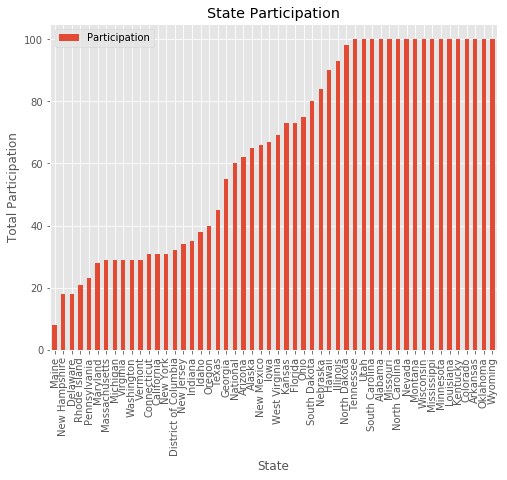

In [60]:
act_participation.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Participation')
plt.title('State Participation')
#As seen before the mean ACT participation was 65%. This graph can give us a better picture of what is going on. 

## Performing EDA on SAT 

In [62]:
sat_data.head(1)

,Unnamed: 0,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,0,Alabama,5,593,572,1165


In [64]:
sat_data.drop('Unnamed: 0', axis = 1, inplace = True)

In [66]:
np.count_nonzero(sat_data.isnull()) 
#There appears to be no missing values for SAT either 

0

In [ ]:
sat_data.Participation = sat_data.Participation.apply(clean)

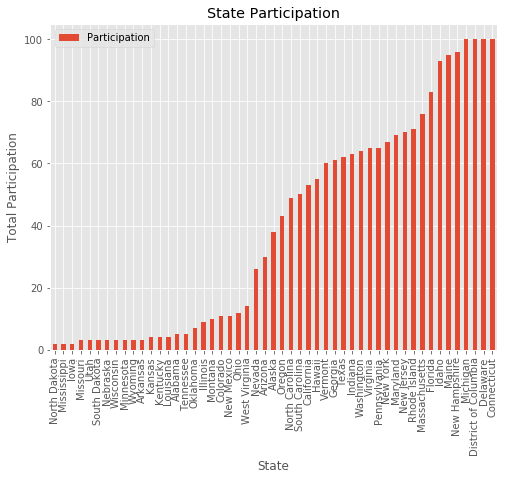

In [92]:
sat_participation = sat_data.pivot_table(index=['State'],
                                  values=['Participation'])
sat_participation.sort_values('Participation', ascending = True, inplace = True)
sat_participation.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Participation')
plt.title('State Participation')

In [72]:
sat_data.describe()

,Participation,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039
std,35.276632,45.666901,47.121395,92.494812
min,2.000000,482.000000,468.000000,950.000000
25%,4.000000,533.500000,523.500000,1055.500000
50%,38.000000,559.000000,548.000000,1107.000000
75%,66.000000,613.000000,599.000000,1212.000000
max,100.000000,644.000000,651.000000,1295.000000


##### Notice that the participation looks a lot less for the SAT. This is surprising given that I though SAT was a lot more prevalent. The mean participation for the SAT was was 40% BUT take note that ACT included another row called National which changes the data a bit. 

## Merging the Data Frames Together 

In [77]:
combined_test = pd.merge(sat_data, act_data, how = 'inner', on=['State'])
#This is conforming ACT to SAT so the row National will be getting deleted. 

In [80]:
combined_test.describe()

,Participation_x,Evidence-Based Reading and Writing,Math_x,Total,Participation_y,English,Math_y,Reading,Science,Composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608
std,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695
min,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000
25%,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000


In [81]:
combined_test.rename(columns={'Participation_x':'Participation%_SAT','Evidence-Based Reading and Writing':'Read_Write_SAT','Math_x':'Math_SAT','Total':'Total_SAT','Participation_y':'Participation%_ACT','English':'Eng_ACT','Math_y':'Math_ACT','Reading':'Reading_ACT','Science':'Science_ACT','Composite':'Composite_ACT'}, inplace=True)

In [82]:
combined_test.head(1)

,State,Participation%_SAT,Read_Write_SAT,Math_SAT,Total_SAT,Participation%_ACT,Eng_ACT,Math_ACT,Reading_ACT,Science_ACT,Composite_ACT
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2


## Plotting More Graphs to Visualize the DATA

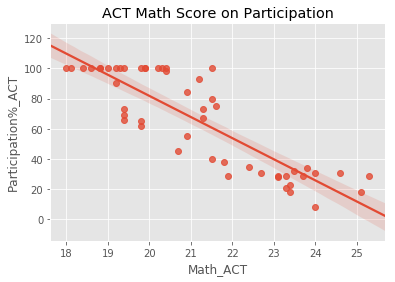

In [83]:
_ = sns.regplot(data=combined_test, x = 'Math_ACT', y = 'Participation%_ACT')
_ = plt.title('ACT Math Score on Participation')
#Assign the graph to _ so that the annoying error message does not show up. 

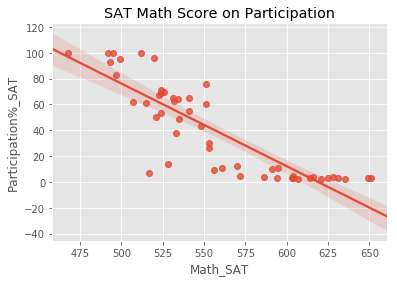

In [84]:
_ = sns.regplot(data=combined_test, x = 'Math_SAT', y = 'Participation%_SAT')
_ = plt.title('SAT Math Score on Participation')
#Assign the graph to _ so that the annoying error message does not show up. 

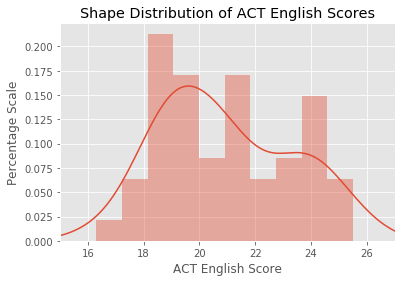

In [85]:
sns.distplot(combined_test.Eng_ACT, bins=10)
plt.xlabel("ACT English Score")
plt.ylabel("Percentage Scale")
plt.title("Shape Distribution of ACT English Scores")
plt.xlim(15,27)
plt.show()

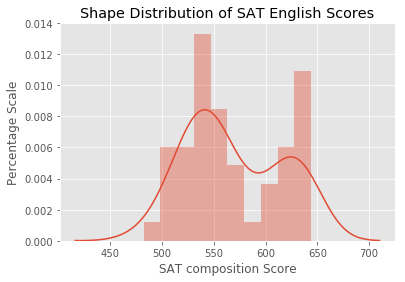

In [87]:
sns.distplot(combined_test.Read_Write_SAT, bins=10)
plt.xlabel("SAT composition Score")
plt.ylabel("Percentage Scale")
plt.title("Shape Distribution of SAT English Scores")
plt.show()

In [89]:
combined_test.sort_values('Participation%_SAT', inplace = True)

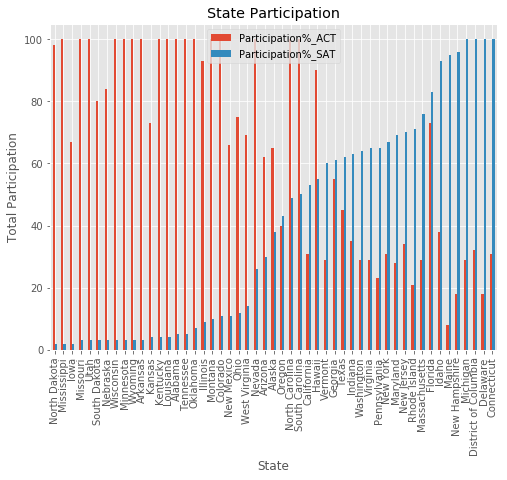

In [96]:
participations = combined_test.pivot_table(index=['State'],
                                  values=['Participation%_SAT','Participation%_ACT'])
participations.sort_values('Participation%_SAT', ascending = True, inplace = True)
participations.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Participation')
plt.title('State Participation')
#Notice how they don't really over lap! We need to us this info to target the states with very little cross over, or 
#really capture those states that are already majority SAT scores. 

## Descriptive and Inferential Statistics

## Summarizing each distribution. 

ACT

Participation:
•	The ACT exam appears to be an average participation rate of 65% nation wide.
•	The Participation appears to have a rather larger spread as the STD accounts for about 32%.
•	The shape appears to be bi modal with two bunches centered around 30% state participation and 100% state participation 

English 
•	The English portion appears to have a nation wide average of about 21/36
•	The spread isn’t too wide as the STD accounts for about 2.3 points, meaning that 95% of the population received a range of 16.4 and 25.6. 
•	The spread almost appears to have a normal distribution, but its not quite there, but also seems to be bi modal around 21 and 19.

Math 
•	Math ACT scores appear to have an average of about 21 nation wide 
•	Math has an even smaller STD than English for about 1.96 score points, signifying a comparatively smaller distribution  
•	Math appears to be slightly skewed to the right, there are some one off states that bring the skew down that way 

Reading 
•	Reading ACT scores appear to have an average of about 22, being the highest subject
•	Reading has a STD of about 2
•	The shape appears to be bi modal around 21 and 25 

Science 
•	Science ACT scores appear to have an average test score of about 21 points
•	There seems to be an STD of 1.7 so the distribution is smaller than the rest 
•	The data appears to be skewed to the right 

Composite
•	The composite ACT score appears to be averaged around 21.5
•	There is an STD of about 2 
•	The distribution is skewed to the right. 


## SAT Distributions

Participation 
•	There appears to be an average SAT participation rate of about 40%
•	There is an STD for participation of about 35% which means this is a wide distribution 
•	The Shape is unimodal around 0-20% 

Evidence-Based Reading and Writing
•	There appears to be an average reading and writing score of about 569 points out of 800
•	There is an average STD of about 46 points with a max of 644 and min of 482. 
•	The shape appears to be bimodal around 540 and 630, although there is a stronger range around 520-550

Math 
•	Math has an average SAT score of about 559 points 
•	Math has an STD of about 47 points with  a max of 651 and min of 468 which is about a +- of 100 points 
•	Math is uni-modal around the score of 530 points 

Total
•	In total through out the country there appears to be an average score of 1126 out of 1600 
•	There is a STD of about 92 points with an average max of 1295 and average min of 950
•	The shape looks bi-modal with peaks around 1050 and 1240. 

##### Summarizing each relationship. 

As there can be a great number of possible relationship combinations, I would like to summarize the finding of these relationsips based of the many graphs that showcase their relationship. Many of the graphs plotted that expressed the relationships between different subject matters and composite/total scores had a positive correlation. This positive correlation is based on the back that most of the data points were clustered around a line of regression showcasing that as one score went up the other generally was higher as well. This makes sense since a student scored high for math they may have utilized a study prep booklet or review class that goes over all the subject, not just one. Of course there will be some outliers who were better at math than english and vice versa. The only negative correlations usually consisted of participation. If participation increased in either ACT or SAT the scores in all the subject areas would generally decrease. This was the same for ACT vs. SAT. As participation in one increased the other would decrease. 

##### Execute a hypothesis test comparing the SAT and ACT participation rates. Using $\alpha = 0.05$. 

In [101]:
import scipy
from scipy.stats import t

#I am going to utilize the ttest_rel function to test my null hypothesis over the ttest_1samp function 
#because the ttest_1samp assumes that the information is independent of one another which doesn't seem to be the case
#some student could take both tests and not just one and many other factors are missing to confirm independence 

scipy.stats.ttest_rel(combined_test['Participation%_SAT'], combined_test['Participation%_ACT'])
#scipy.stats.ttest_rel(a, b, axis=0)

Ttest_relResult(statistic=-2.8095519783707883, pvalue=0.0070619284220823798)

Given our pvalue of .007 we are confident that we can reject the hull hypothesis with over a 95% confidence level. This assumes with greater certainity that SAT Participation rates do not equal those of ACT Participation rates. 

##### Generating and interpreting a 95% confidence interval for SAT and ACT participation rates.

In [100]:
import scipy.stats as stats
n = 51
conf_level = .95
degrees_of_freedom = 50
mean = 52.529
#finding the new mean 
#(ACT_New.Participation.sum()+SAT.Participation.sum())/102
stats.norm.interval(conf_level, loc=mean, scale=mean/(n ** 0.5))

# This means that we are 95% confident that the true value lies between 38.11 and 66.94


(38.112423656195404, 66.945576343804603)

##### Is it appropriate to generate correlation between SAT and ACT math scores? Why?

A correlation between SAT and ACT could be appropriate depending on how accurate one would like to be. Given both of these tests have a higher participation rate in different states that could skew the data. For instance 100% of District of Columbia took the SAT but scored the worst on average in the United States; however a subset of students in D.C. who took the ACT scored an average of 23.5, which is higher than 95% of the national average. Given that each state has a rather different demographic and social economic class structure that could really invalidate the correllation resutls. 

##### Suppose we only seek to understand the relationship between SAT and ACT data in 2017. Does it make sense to conduct statistical inference given the data we have? Why?

There are many assumptions that are having to be made here. I am unsure how these results were collected. We would like to think that the SAT and ACT administering companies gave us their full population data, but it is also likely that they gave us data of a sample population. The ACT listed data stating that 100% the population took their exam. I find that hard to believe and who is in that population? If it was a sample population how many student scores were taken into consideration. If the data was not collected from the entire population, but instead from a sample population, did they take a simple random sample to calculate STD's and averages? 

If one was able to hold many more variables constant allowing the two tests to be held independently of one another then I think a statistical inference could be given. As this does not appear to be the case, I don't think a statistical inference would be useful.